In [2]:

# import libraries
from __future__ import division
import nltk
import nltk, re, pprint
import pandas as pd

In [3]:
from urllib.request import urlopen
url = "https://www.gutenberg.org/cache/epub/964/pg964.txt"
raw = urlopen(url).read()

# convert from byte type to string
text = raw.decode('UTF-8')
print(type(text))

<class 'str'>


In [4]:
raw

b'\xef\xbb\xbfProject Gutenberg\'s The Merry Adventures of Robin Hood, by Howard Pyle\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: The Merry Adventures of Robin Hood\r\n\r\nAuthor: Howard Pyle\r\n\r\nRelease Date: February 5, 2006 [EBook #964]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK THE MERRY ADVENTURES OF ROBIN HOOD ***\r\n\r\n\r\n\r\n\r\nProduced by Charles Keller and David Widger\r\n\r\n\r\n\r\n\r\n\r\nTHE MERRY ADVENTURES OF ROBIN HOOD\r\n\r\nby Howard Pyle\r\n\r\n\r\n\r\nPREFACE\r\n\r\nFROM THE AUTHOR TO THE READER\r\n\r\n\r\nYou who so plod amid serious things that you feel it shame to give\r\nyourself up even for a few short moments to mirth and joyousness in the\r\nland of Fancy; you who think that life hat

In [5]:
# tokenizing text
tokens = nltk.word_tokenize(text)
type(tokens)

list

In [7]:
# collapse case distinctions and ignore punctuation
word_list = [w.lower() for w in tokens if w.isalpha()]

# get number of unique words
len(set(word_list))

6441

In [8]:
word_list

['gutenberg',
 'the',
 'merry',
 'adventures',
 'of',
 'robin',
 'hood',
 'by',
 'howard',
 'pyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'title',
 'the',
 'merry',
 'adventures',
 'of',
 'robin',
 'hood',
 'author',
 'howard',
 'pyle',
 'release',
 'date',
 'february',
 'ebook',
 'language',
 'english',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'merry',
 'adventures',
 'of',
 'robin',
 'hood',
 'produced',
 'by',
 'charles',
 'keller',
 'and',
 'david',
 'widger',
 'the',
 'merry',
 'adventures',
 'of',
 'robin',
 'hood',
 'by',
 'howard',
 'pyle',
 'preface',
 'from',
 'the',
 'author',
 'to',
 'the',
 'reader

In [9]:
# get the most common words used
nltk.FreqDist(word_list).most_common(20)

[('the', 6089),
 ('and', 4188),
 ('of', 2778),
 ('a', 2523),
 ('to', 2337),
 ('he', 1974),
 ('i', 1801),
 ('his', 1754),
 ('that', 1561),
 ('in', 1557),
 ('for', 1330),
 ('thou', 1141),
 ('robin', 1040),
 ('with', 996),
 ('as', 990),
 ('so', 944),
 ('but', 882),
 ('all', 841),
 ('it', 833),
 ('not', 764)]

In [10]:
# get stop words
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:

# get most frequent words that are not stop words
word_list = [w.lower() for w in word_list]  # handle the case sensitivity
filtered_words = [word for word in word_list if word not in stopwords.words('english')]
freq_list = (nltk.FreqDist(filtered_words).most_common(30))

freq_df = pd.DataFrame(freq_list,columns=['Word','Frequency'])
freq_df

,Word,Frequency
0,thou,1141
1,robin,1040
2,upon,594
3,thee,559
4,little,553
5,quoth,493
6,said,485
7,thy,469
8,good,468
9,john,447


In [12]:
# calculate relative frequency
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs
rel_freq_list = rel_freq(filtered_words)

# sort words based on relative frequency
from operator import itemgetter
sorted_list = sorted(rel_freq_list, key=itemgetter(1), reverse=True)
final_list = sorted_list[:200]

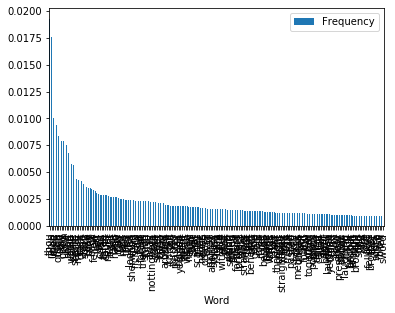

In [13]:
# plot the top 200 highest relative frequency words
rel_freq_df = pd.DataFrame(final_list,columns=['Word','Frequency'])
rel_freq_df.plot.bar(x='Word', y='Frequency', rot=90)

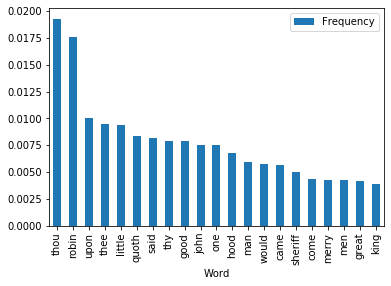

In [14]:

# plot the top 20 higest relative freqency words
rel_freq_df.iloc[0:21].plot.bar(x='Word', y='Frequency', rot=90)

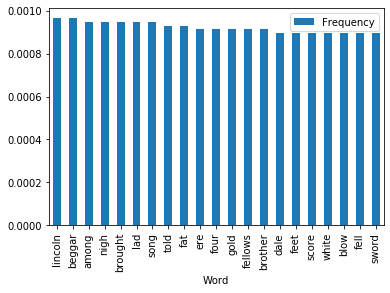

In [15]:
# plot the bottom 20 
rel_freq_df.iloc[179:201].plot.bar(x='Word', y='Frequency', rot=90)